## Data Understanding

### Given dataset contains 2 columns i.e DeliveryTime, SortingTime.
### Now we need to find out whether there is a relationship between between the DeliveryTime and SortingTime using Simple Linear Regression Model.
### If there is a relationship between the variables then we need to build a model to predict the DeliveryTime depending on the SortingTime.
### Here : SortingTime is a Independent variable and DeliveryTime is a Dependent variable¶

## Data Preprocessing

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
#Import libraries
import pandas as pd
import seaborn as sns

In [110]:
data=pd.read_csv(r"C:\Users\hp\Downloads\delivery_time.csv")
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [112]:
data.shape

(21, 2)

In [113]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Data Visualization

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

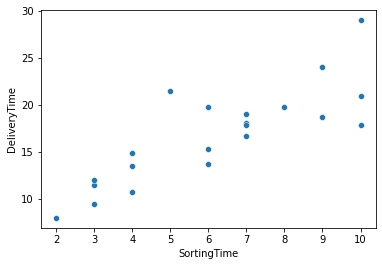

In [114]:
sns.scatterplot(x=data['SortingTime'],y=data['DeliveryTime'])

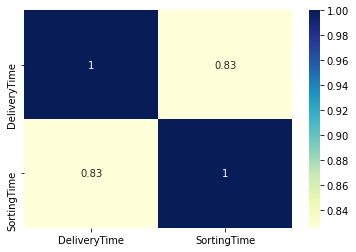

In [115]:
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [116]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


## Model Building

#### Building a model using linear_model

In [22]:
x = data['SortingTime']
y = data['DeliveryTime']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
x_train

1      4
9      9
17     7
12     7
5      6
2      6
4     10
14     3
10     8
16     6
15     4
7      3
3      9
8     10
Name: SortingTime, dtype: int64

In [31]:
y_train

1     13.50
9     18.75
17    18.11
12    16.68
5     15.35
2     19.75
4     29.00
14    12.03
10    19.83
16    13.75
15    14.88
7      9.50
3     24.00
8     17.90
Name: DeliveryTime, dtype: float64

In [32]:
x_train.shape

(14,)

In [33]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [34]:
print(x_train.shape)
print(x_test.shape)

(14, 1)
(7, 1)


In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [36]:
lm.score(x_train,y_train)

0.6766341232981345

## Model Evaluation

In [80]:
from sklearn.metrics import r2_score
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6448509210596076
0.6822804816985795


Here the testing acuuracy is greater than  the training accuracy which causes overfitting.

In [95]:
#model_influence = model.get_influence()
#(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
#import matplotlib.pyplot as plt
#import numpy as np
#fig = plt.subplots(figsize=(20, 7))
#plt.stem(np.arange(len(data)), np.round(c, 3))
#plt.xlabel('Row index')
#plt.ylabel('Cooks Distance')
#plt.show()

In [82]:
#Removing outliers
data1=data.drop(data.index[[4]],axis=0).reset_index()

In [83]:
data1

,index,DeliveryTime,SortingTime
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,8,17.90,10
8,9,18.75,9
9,10,19.83,8


In [96]:
#Rebuilding the model after removing outliers
x = data1['SortingTime']
y = data1['DeliveryTime']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [85]:
x_train

9      8
14     4
12     3
5      7
2      6
4      6
10     4
0     10
15     6
7     10
3      9
8      9
Name: SortingTime, dtype: int64

In [86]:
y_train

9     19.83
14    14.88
12    11.50
5     19.00
2     19.75
4     15.35
10    10.75
0     21.00
15    13.75
7     17.90
3     24.00
8     18.75
Name: DeliveryTime, dtype: float64

In [87]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [88]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [89]:
model1.intercept_

8.114162303664923

In [90]:
model1.score(x_train,y_train)

0.6437815015286776

In [91]:
from sklearn.metrics import r2_score
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6437815015286776
0.5986349759250463


The R2 values of the train and test data are:
R2 train_data = 0.6437
R2 test_data = 0.5986

The R2 value on test data is within 5% of the R2 value on training data. We can apply the model to the unseen test set in the future.